In [25]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import utils as u
import peakutils as pu
from scipy.signal import savgol_filter

In [24]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421.npy'
filename2='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/energyNotrace/Std-232Th-3Bq-AEcalibration-im010421.npy'
coll=ca.NPYreader(filename,True).get_event()
coll_tot=ca.NPYreader(filename2,False).get_event()
np.where(coll.get_n_peaks_2der()-coll.get_zeros_2der() !=0)[0]

array([     3,      4,      7, ..., 136878, 136883, 136885])

In [17]:
coll1=coll.subset('ae',0,1.6e-2)
curr1=coll1.get_curr()
trace1=coll1.get_traces()
coll2=coll.subset('ae',1.90e-2,1.95e-2)
trace2=coll2.get_traces()
curr2=coll2.get_curr()

<IPython.core.display.Javascript object>


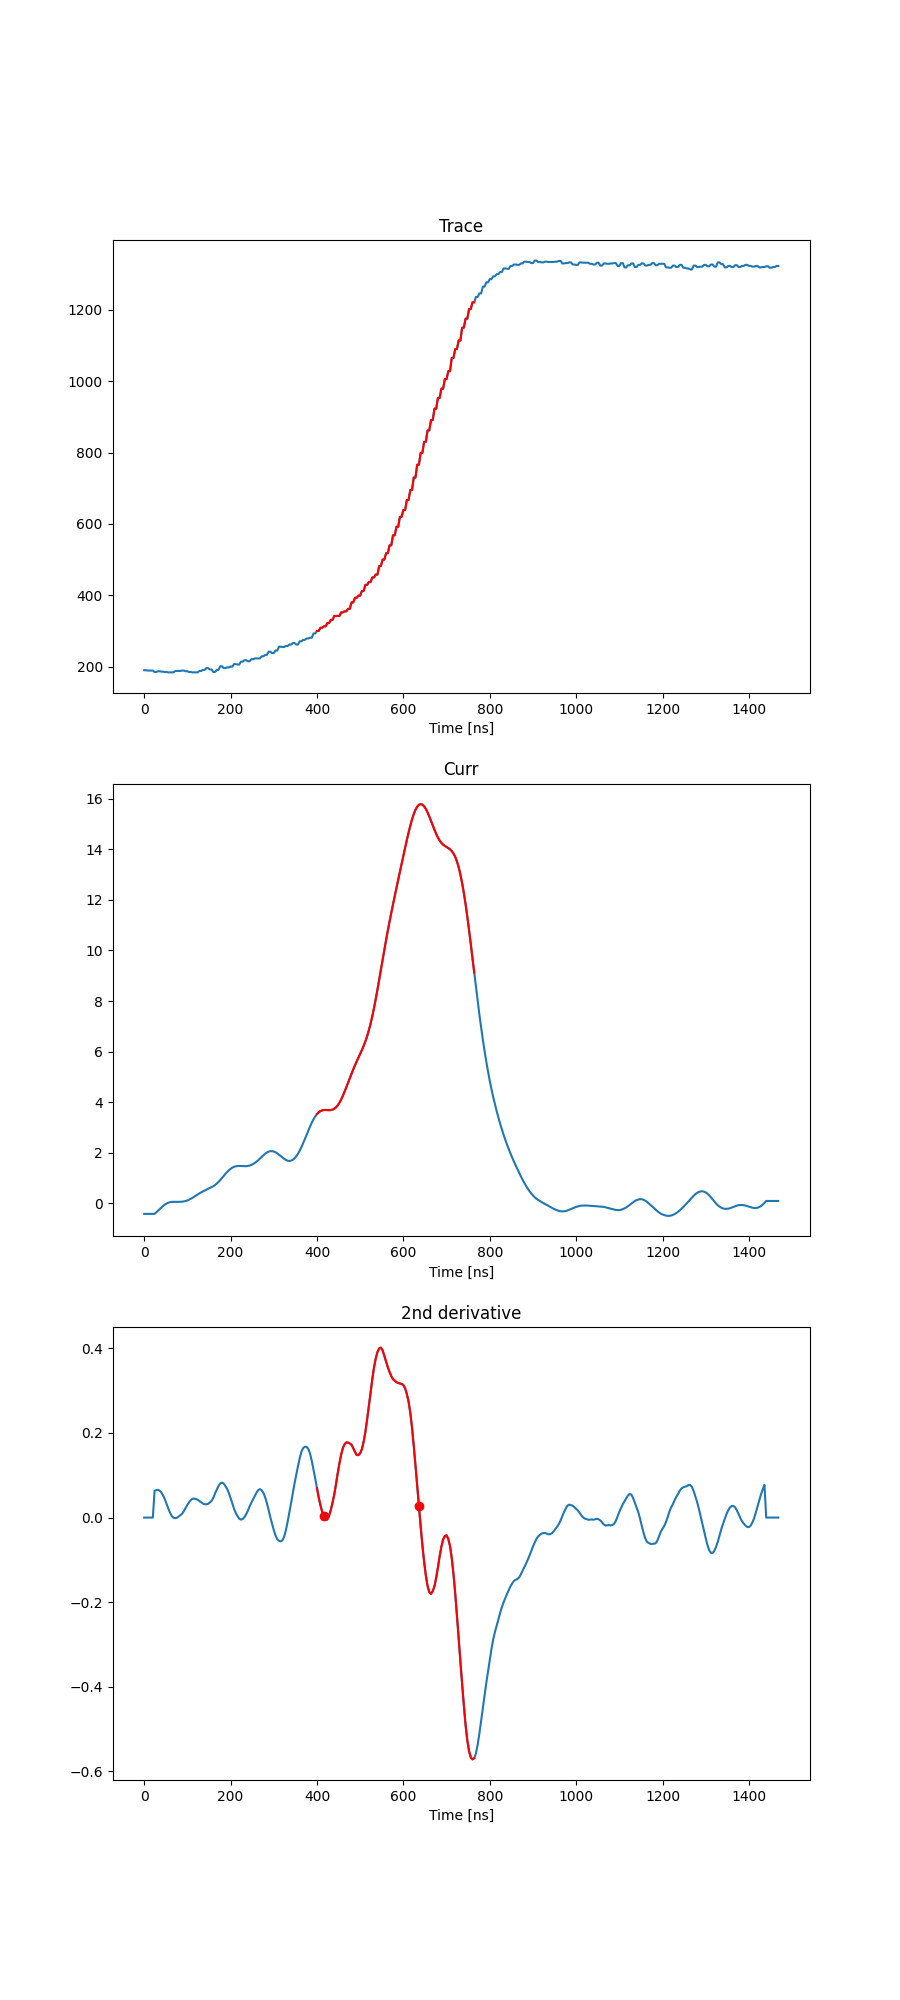

In [18]:
from begepro.dspro import utils as u
nd_der_obj=u.second_derivative()
rtobj=u.rise_time()

i=5
c,f=nd_der_obj.compute_der(curr1[i])
time=np.arange(0,len(c),1)*4
fig,axs=plt.subplots(3,figsize=(9,20))
axs[0].plot(time,trace1[i])
axs[0].set_title('Trace')
axs[1].plot(time,c)
axs[1].set_title('Curr')
axs[2].plot(time,f)
axs[2].set_title('2nd derivative')

#axs[0].set(xlabel='Time [ns]',ylabel='ADC Channel')
#axs[1].set(xlabel='Time [ns]',ylabel='ADC Channel')
#axs[2].set(xlabel='Time [ns]',ylabel='ADC Channel')

axs[0].set(xlabel='Time [ns]')
axs[1].set(xlabel='Time [ns]')
axs[2].set(xlabel='Time [ns]')

rt,t=rtobj.compute_rt(trace1[i],4e-9)

x=np.arange(0,len(trace1[i]),1)
axs[0].plot(x[t[0] : t[1]]*4,trace1[i][t[0] : t[1]],color='r')
axs[1].plot(x[t[0] : t[1]]*4,c[t[0] : t[1]],color='r')
axs[2].plot(x[t[0] : t[1]]*4,f[t[0] : t[1]],color='r')
plt.show()


indexes=nd_der_obj.compute_n_zeros2(curr1[i],t)

plt.scatter(indexes*4,f[indexes],marker='o',color='r')

plt.show()

<IPython.core.display.Javascript object>


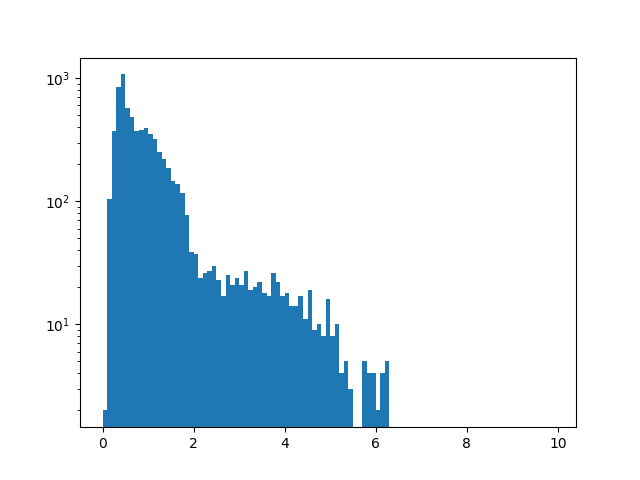

[]

In [12]:
l2=[]
for i in range(0,len(trace1)):
    c,f=nd_der_obj.compute_der(curr1[i])
    l2.append(max(f))

plt.figure()
plt.hist(l2,bins=np.arange(0,10,0.1))
plt.semilogy()
    

<IPython.core.display.Javascript object>


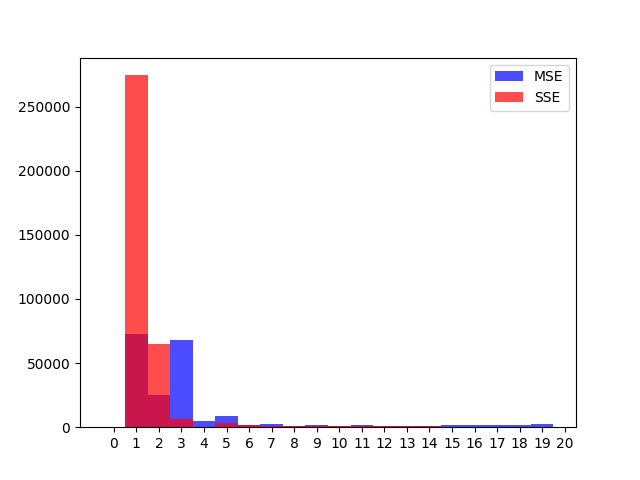

<IPython.core.display.Javascript object>


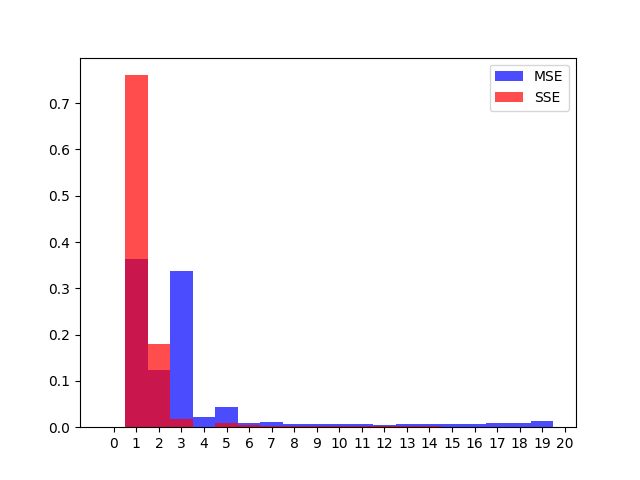

[1.1000e+01 7.2795e+04 2.4852e+04 6.7820e+04 4.5390e+03 8.6000e+03
 1.8700e+03 2.1980e+03 1.3130e+03 1.4940e+03 1.1960e+03 1.3360e+03
 1.1200e+03 1.3040e+03 1.2640e+03 1.4310e+03 1.5230e+03 1.6340e+03
 1.6890e+03 2.8320e+03]


array([], dtype=int64)

In [21]:
n1=coll_tot.subset('ae',0,1.6e-2).get_zeros_2der()
n2=coll_tot.subset('ae',1.90e-2,1.95e-2).get_zeros_2der()
plt.figure()
bins=np.linspace(0,20,21)
c1=plt.hist(n1,color='b',alpha=0.7,bins=bins,label='MSE',align='left')
plt.hist(n2,color='r',alpha=0.7,bins=bins,label='SSE',align='left')
plt.xticks(range(21))
plt.legend()

#Normalized

n1=coll_tot.subset('ae',0,1.6e-2).get_zeros_2der()
n2=coll_tot.subset('ae',1.90e-2,1.95e-2).get_zeros_2der()
plt.figure()
bins=np.linspace(0,20,21)
plt.hist(n1,color='b',alpha=0.7,bins=bins,label='MSE',align='left',density=True)
plt.hist(n2,color='r',alpha=0.7,bins=bins,label='SSE',align='left',density=True)
plt.xticks(range(21))
plt.legend()

print(c1[0])

<IPython.core.display.Javascript object>


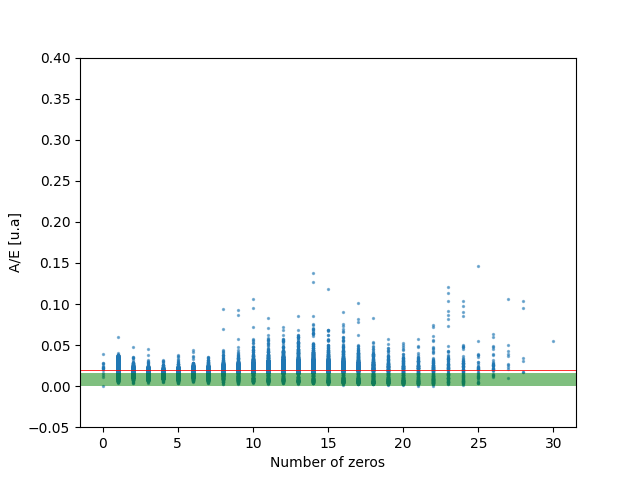

In [7]:
#Scatter plot
plt.figure()
plt.scatter(coll_tot.get_zeros_2der(),coll_tot.get_avse(),s=2,alpha=0.5)
plt.show()

plt.xlabel('Number of zeros')
plt.ylabel('A/E [u.a]')
plt.ylim(-0.05,0.4)

plt.annotate('MSE',(73,-0.015),color='g')
plt.annotate('SSE',(73,0.025),color='r')
plt.axhspan(0,1.6e-2,facecolor='g',alpha=0.5)
plt.axhspan(1.90e-2,1.95e-2,facecolor='r',alpha=0.8)

<IPython.core.display.Javascript object>


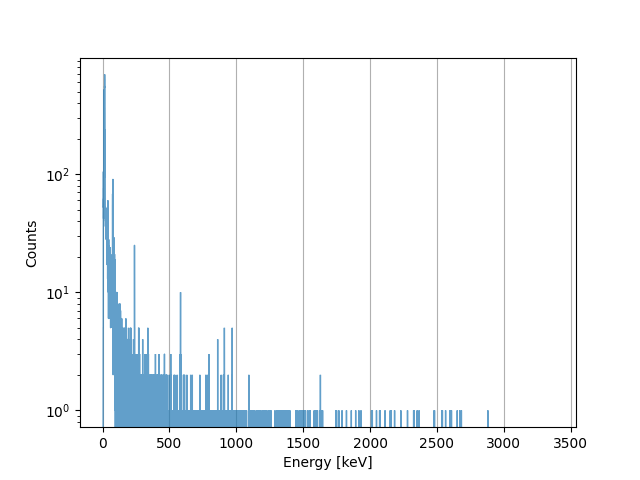

Text(0, 0.5, 'Counts')

In [8]:
#Spectrum of the events with n_zeros>4
calVec = [-0.090383 + 0.20574*i for i in range(2**14+1)]
coll3=coll_tot.subset('zeros_2der',4)
plt.figure()
plt.hist(coll3.get_energies(), bins=calVec, histtype='step', alpha=0.7)
plt.semilogy()
plt.grid(axis='x')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')

<IPython.core.display.Javascript object>


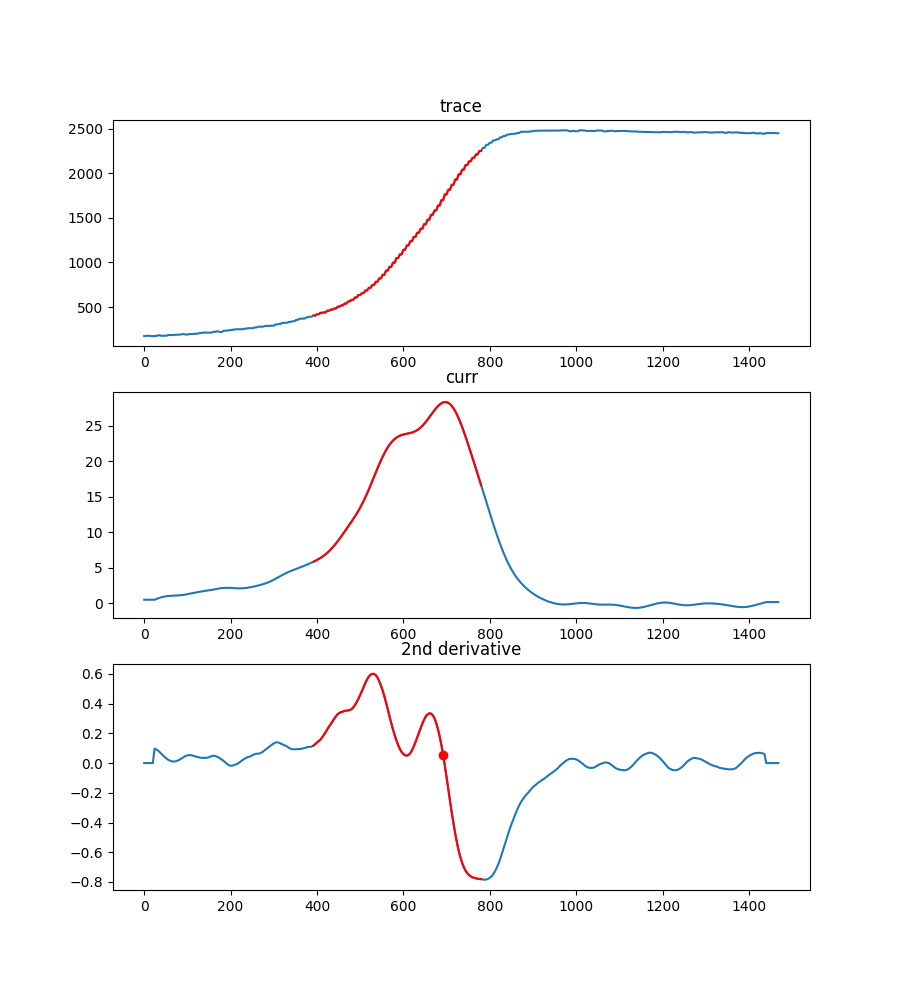

0.013050655551920537


In [11]:
from begepro.dspro import utils as u
i=0
trace1=coll1.subset('zeros_2der',cutmin=1,cutmax=1).get_traces()
curr1=coll1.subset('zeros_2der',cutmin=1,cutmax=1).get_curr()

#print(len(trace1)/len(coll1.get_energies()))
#curr1=coll1.subset('zeros_2der',cutmin=10).subset('energy',580,586).get_curr()
c,f=nd_der_obj.compute_der(curr1[i])
fig,axs=plt.subplots(3,figsize=(9,10))
axs[0].plot(time,trace1[i])
axs[0].set_title('trace')
axs[1].plot(time,c)
axs[1].set_title('curr')
axs[2].plot(time,f)
axs[2].set_title('2nd derivative')
plt.show()

rtobj=u.rise_time()
rt,t=rtobj.compute_rt(trace1[i],4e-9)

x=np.arange(0,len(trace1[i]),1)
axs[0].plot(x[t[0] : t[1]]*4,trace1[i][t[0] : t[1]],color='r')
axs[1].plot(x[t[0] : t[1]]*4,c[t[0] : t[1]],color='r')
axs[2].plot(x[t[0] : t[1]]*4,f[t[0] : t[1]],color='r')
plt.show()

nd_der_obj=u.second_derivative()
indexes=nd_der_obj.compute_n_zeros2(curr1[i],t)

axs[2].scatter(indexes*4,f[indexes],marker='o',color='r')

print(coll1.subset('zeros_2der',cutmin=5,cutmax=5).subset('energy',0,100).get_avse()[i])